In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict

In [2]:
dataset = pd.read_csv('./dataset/SMSSpamCollection_Split', sep=',')
dataset.head(10)

,label,text,split
0,ham,si take mokka player,train
1,ham,food,train
2,ham,pizza u want,train
3,ham,heart empty without love mind empty without wi...,train
4,ham,whats feathery bowa something guy dont know,train
5,ham,birthday feb ltgt da,train
6,ham,ive trying reach without success,train
7,ham,funny fact nobody teach volcano erupt tsunami ...,train
8,ham,oops got bit,train
9,ham,tuesday night r u real,train


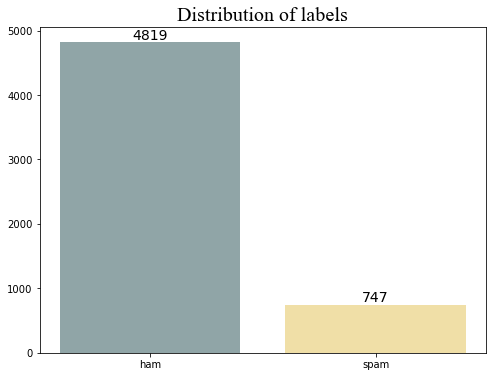

In [3]:
labels = ['ham', 'spam']
counts = [len(dataset[dataset['label'] == 'ham']), len(dataset[dataset['label'] == 'spam'])]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, counts, color=['#90A5A7', '#F0DFA7'])
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=14)

ax.set_title('Distribution of labels', fontsize=20, fontname='Times New Roman')
plt.show()


In [4]:
dataset['message_len'] = dataset['text'].apply(lambda x: len(x.split(' ')))
dataset.head(10)

,label,text,split,message_len
0,ham,si take mokka player,train,4
1,ham,food,train,1
2,ham,pizza u want,train,3
3,ham,heart empty without love mind empty without wi...,train,25
4,ham,whats feathery bowa something guy dont know,train,7
5,ham,birthday feb ltgt da,train,4
6,ham,ive trying reach without success,train,5
7,ham,funny fact nobody teach volcano erupt tsunami ...,train,18
8,ham,oops got bit,train,3
9,ham,tuesday night r u real,train,5


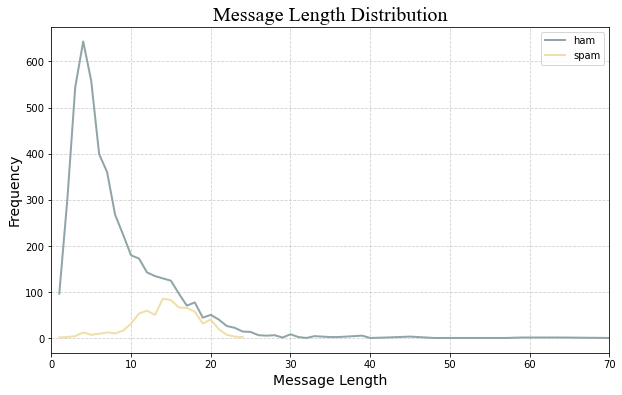

In [5]:
dataset['message_len'] = dataset['text'].apply(lambda x: len(x.split(' ')))
ham_df = dataset[dataset['label'] == 'ham']['message_len'].value_counts().sort_index()
spam_df = dataset[dataset['label'] == 'spam']['message_len'].value_counts().sort_index()


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ham_df.index, ham_df.values, label='ham', color='#90A5A7', linewidth=2)
ax.plot(spam_df.index, spam_df.values, label='spam', color='#F0DFA7', linewidth=2)
ax.set_title('Message Length Distribution', fontsize=20, fontname='Times New Roman')
ax.set_xlabel('Message Length', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xlim([0, 70])
ax.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

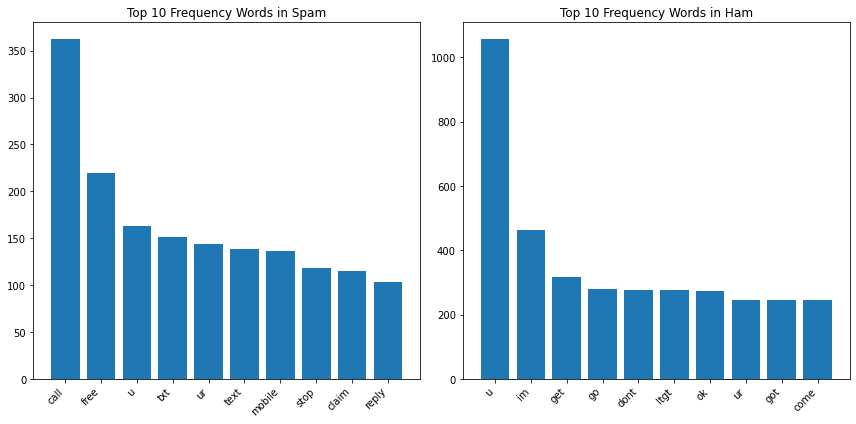

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Split the dataset into spam and ham messages
spam_messages = dataset[dataset['label'] == 'spam']['text'].str.cat(sep=' ')
ham_messages = dataset[dataset['label'] == 'ham']['text'].str.cat(sep=' ')

# Function to compute top N high-frequency words
def top_frequency(text, top_n=10):
    words = text.split()
    word_count = Counter(words)
    top_words = word_count.most_common(top_n)
    return dict(top_words)

top_spam_words = top_frequency(spam_messages, top_n=10)
top_ham_words = top_frequency(ham_messages, top_n=10)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_spam_words.keys(), top_spam_words.values())
plt.title('Top 10 Frequency Words in Spam')
plt.xticks(rotation=45, ha='right')
plt.subplot(1, 2, 2)
plt.bar(top_ham_words.keys(), top_ham_words.values())
plt.title('Top 10 Frequency Words in Ham')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


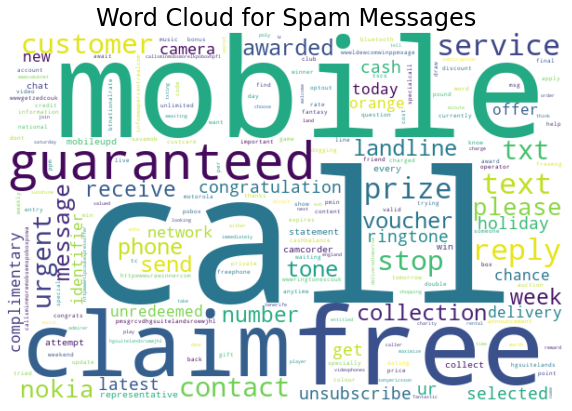

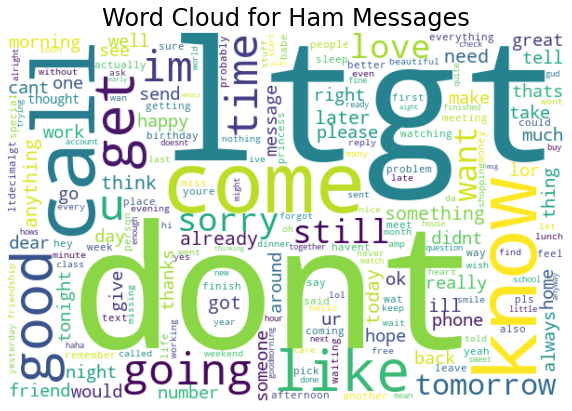

In [7]:

# Function to compute adjusted frequencies based on word length
def compute_adjusted_frequencies(text):
    words = text.split()
    freq = defaultdict(int)
    for word in words:
        freq[word] += len(word) ** 1.2
#         freq[word] += 1
    return freq

# Compute adjusted frequencies
spam_freq = compute_adjusted_frequencies(spam_messages)
ham_freq = compute_adjusted_frequencies(ham_messages)

# Create word clouds
spam_wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(spam_freq)
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(ham_freq)

# Plot word cloud for spam messages
plt.figure(figsize=(10, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages',fontsize=24)
plt.show()

# Plot word cloud for ham messages
plt.figure(figsize=(10, 8))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages',fontsize=24)
plt.show()